<a href="https://colab.research.google.com/github/pinkee2611/ML/blob/main/Money_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import thư viện
import numpy as np
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array

In [6]:
#load folder datasets
folder = '/content/drive/MyDrive/FaceValueOfMoney/'
#tiến hành tiền xử lý dữ liệu
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k'):
    output = 1.0
  if file.startswith('10k'):
    output = 2.0
  if file.startswith('20k'):
    output = 3.0
  if file.startswith('50k'):
    output = 4.0
  if file.startswith('100k'):
    output = 5.0
  if file.startswith('500k'):
    output = 6.0

  img =load_img(folder+file,target_size=(100,200))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

(510, 100, 200, 3) (510,)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# lưu dữ liệu vừa xử lý
save('tien_hinh_hoc.npy',photos)
save('tien_ten_hoc.npy',labels)

In [9]:
# tạo dữ liệu train
x_train = np.load('/content/tien_hinh_hoc.npy')
y_train = np.load('/content/tien_ten_hoc.npy')

In [10]:
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,10)

In [11]:
#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(100,200,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
# train mô hình
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=32,epochs = 50,verbose = 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 100, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 100, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 100, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 50, 64)        0

In [12]:
#lưu mô hình vừa train
model.save('hoc_hinh_tien.h5')

In [15]:
model5=load_model('/content/hoc_hinh_tien.h5')

1/1 [==============================] - 0s 204ms/step


'100000'

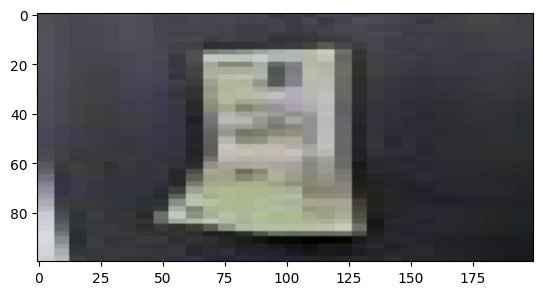

In [16]:
vat = {1: '5000',2:'10000', 3:'20000', 4:'50000', 5:'100000', 6:'500000' }
img = load_img("/content/drive/MyDrive/FaceValueOfMoney/100k (10).jpg",target_size=(100,200))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,100,200,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 30ms/step


'500000'

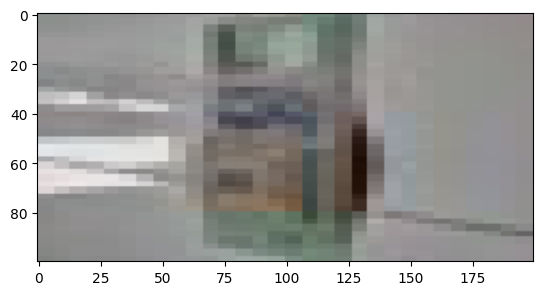

In [17]:
img = load_img("/content/drive/MyDrive/FaceValueOfMoney/500k (5)(1).jpg",target_size=(100,200))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,100,200,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]